# Feature 

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests as rq
import json
import numpy as np
import pickle
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from time import sleep
from bs4 import BeautifulSoup

<font size=6>Read file</font>

In [7]:
train = pd.read_pickle('C:/Users/88690/Desktop/人工/NYCU-Intro-AI-Project/final-project/nytimes-dataset/train_30000.pkl')
train = train.drop(train[train['n_comment'] <= 0].index)
#print(train.columns)
#train = train.drop(columns = ['web_url', 'headline'])
train


,web_url,print_section,print_page,news_desk,section_name,type_of_material,word_count,subsection_name,pub_year,pub_month,...,abstract_len,abstract_dup,headline,headline_len,headline_dup,headline_kicker,len_lead,keywords,authors,n_comment
12,https://www.nytimes.com/2021/01/01/nyregion/85...,MB,1,Metropolitan,New York,News,1920,NaN,2021,1,...,28,0,How the Oldest Old Can Endure Even This,8,0,None,66,"[Elderly, Nursing Homes, Retirement Communitie...",[John Leland],186
14,https://www.nytimes.com/2021/01/01/climate/tru...,A,19,Climate,Climate,News,1582,NaN,2021,1,...,25,0,"How Trump Tried, but Largely Failed, to Derail...",12,0,None,49,"[Global Warming, Environment, Research, United...",[Christopher Flavelle],10
18,https://www.nytimes.com/2021/01/01/realestate/...,RE,1,RealEstate,Real Estate,News,2567,NaN,2021,1,...,22,0,New Yorkers Who Fled the Virus Are Returning H...,10,0,None,77,"[Real Estate and Housing (Residential), Rentin...",[Steven Kurutz],343
30,https://www.nytimes.com/2021/01/01/opinion/nur...,SR,5,OpEd,Opinion,Op-Ed,1556,NaN,2021,1,...,26,0,"‘Because of You Guys, I’m Stuck in My Room’",9,0,None,59,"[Quarantine (Life and Culture), Quarantines, L...",[Kristin Lin],97
45,https://www.nytimes.com/2021/01/01/crosswords/...,NaN,NaN,Games,Crosswords & Games,News,556,NaN,2021,1,...,4,0,Drink That You Could Really Use,6,0,"Wordplay, The CROSSWORD COLUMN",65,"[Crossword Puzzles, Deeney, Joe (Crossword Con...",[Caitlin Lovinger],112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39850,https://www.nytimes.com/2022/12/30/crosswords/...,NaN,NaN,Games,Crosswords & Games,News,619,NaN,2022,12,...,11,0,Get Frothy,2,0,"Wordplay, The CROSSWORD COLUMN",100,[Crossword Puzzles],[Caitlin Lovinger],113
39857,https://www.nytimes.com/interactive/2022/12/31...,NaN,NaN,The Upshot,The Upshot,Interactive Feature,0,NaN,2022,12,...,17,0,Readers Sent Us Pandemic Photos in 2020. Here’...,13,0,None,17,"[Coronavirus (2019-nCoV), Photography, Quarant...","[Alicia Parlapiano, Emily Badger, Claire Mille...",99
39866,https://www.nytimes.com/2022/12/31/books/molly...,NaN,NaN,BookReview,Books,News,819,NaN,2022,12,...,7,10,"The Jackal, the Fox and Auld Lang Syne",8,0,None,2,"[Books and Literature, internal-sub-only-nl]",[Molly Young],18
39877,https://www.nytimes.com/2022/12/31/us/politics...,NaN,NaN,Investigative,U.S.,News,7958,Politics,2022,12,...,22,0,The Invention of Elise Stefanik,5,0,None,5,"[Stefanik, Elise, Trump, Donald J, Republican ...",[Nicholas Confessore],814


<font size=6>select bound of is_popular</font>

In [9]:
median = train['n_comment'].median()
print(median)
train['is_popular'] = train['n_comment'].apply(lambda x : 1 if x > median else 0)
pop_count = 0
for i in train['is_popular']:
    if i:
        pop_count += 1
print('popular:    ' , pop_count / len(train))
print('not popular:' , 1 - pop_count / len(train))
#train = train.drop(columns = ['n_comment'])

58.0
popular:     0.496098104793757
not popular: 0.5039018952062431


In [13]:
print(train.columns)

Index(['web_url', 'print_section', 'print_page', 'news_desk', 'section_name',
       'type_of_material', 'word_count', 'subsection_name', 'pub_year',
       'pub_month', 'pub_day', 'pub_weekday', 'pub_time', 'abstract',
       'abstract_len', 'abstract_dup', 'headline', 'headline_len',
       'headline_dup', 'headline_kicker', 'len_lead', 'keywords', 'authors',
       'n_comment', 'is_popular'],
      dtype='object')


<font size=6>Hour</font>


pub_time
0     0.699367
1     0.624161
2     0.686508
3     0.710692
4     0.251497
5     0.265823
6     0.269006
7     0.525362
8     0.466125
9     0.545347
10    0.518229
11    0.287273
12    0.394068
13    0.313152
14    0.362101
15    0.500000
16    0.485507
17    0.484375
18    0.373762
19    0.513953
20    0.456193
21    0.498270
22    0.523659
23    0.681093
Name: is_popular, dtype: float64
0.13373397604036077


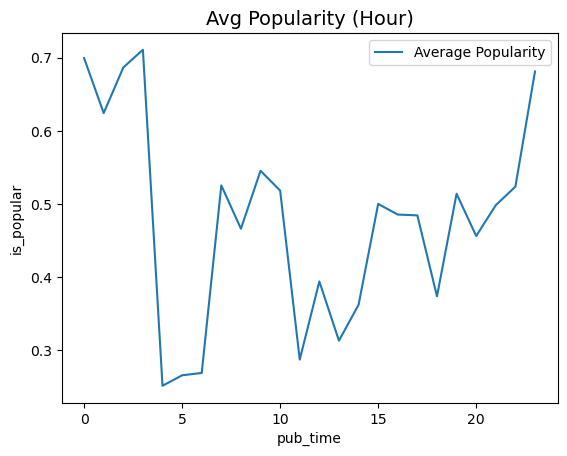

In [14]:
print(train.groupby('pub_time').mean()['is_popular'])
sns.lineplot(data = train.groupby('pub_time').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (Hour)', fontsize=14)
#plt.axvline(x = 3, linestyle= '--')

train['is_noon'] = train['pub_time'].apply(lambda x : 1 if (x <= 3 or x >= 23) else 0)
print(train.corr()['is_popular']['is_noon'])

<font size=6>Weekday</font>

In [15]:
print(train.groupby('pub_weekday').mean()['is_popular'])

pub_weekday
0    0.504735
1    0.494004
2    0.457762
3    0.463652
4    0.481602
5    0.713141
6    0.552891
Name: is_popular, dtype: float64


<font size=6>day of week</font>

0.09470977905951827


Text(0.5, 1.0, 'Avg Popularity (Day of Week)')

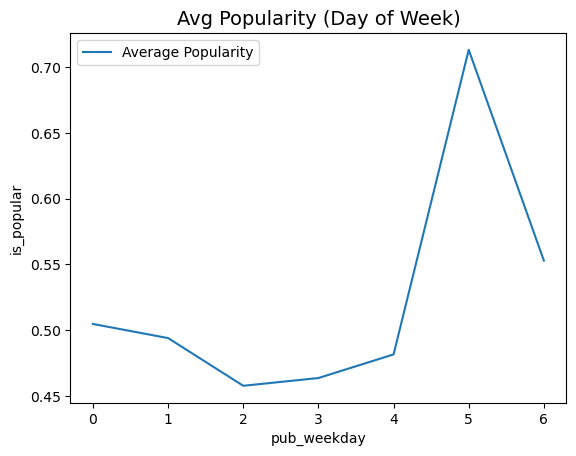

In [16]:
train['is_weekend'] = train['pub_weekday'].apply(lambda x : 1 if (x == 5 or x == 6) else 0)
print(train.corr()['is_popular']['is_weekend'])
sns.lineplot(data = train.groupby('pub_weekday').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (Day of Week)', fontsize=14)


<font size=6>day of month</font>

pub_day
1     0.511936
2     0.519481
3     0.503722
4     0.543307
5     0.507246
6     0.471850
7     0.493056
8     0.482759
9     0.473418
10    0.505155
11    0.507812
12    0.498741
13    0.508728
14    0.519704
15    0.476316
16    0.505025
17    0.458974
18    0.445876
19    0.494819
20    0.509333
21    0.505000
22    0.476923
23    0.480211
24    0.502674
25    0.476584
26    0.523944
27    0.519582
28    0.510870
29    0.473545
30    0.496667
31    0.458564
Name: is_popular, dtype: float64


Text(0.5, 1.0, 'Avg Popularity (day)')

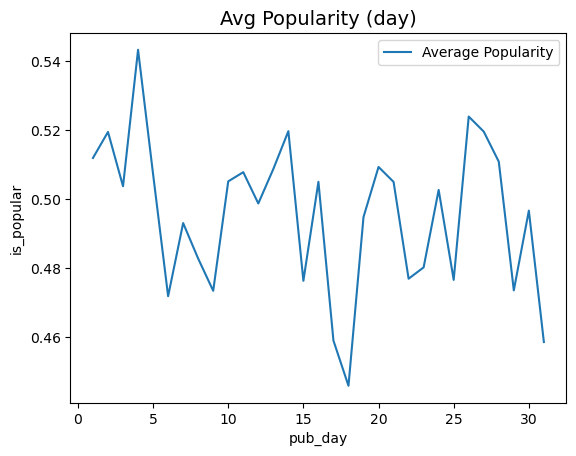

In [17]:
print(train.groupby('pub_day').mean()['is_popular'])
sns.lineplot(data = train.groupby('pub_day').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (day)', fontsize=14)
#train = train.drop(columns = ['pub_day'])
#train['is_noon'] = train['pub_time'].apply(lambda x : 1 if (x <= 3 or x >= 23) else 0)
#print(train.corr()['is_popular']['is_noon'])

<font size=6>month</font>

pub_month
1     0.510972
2     0.492308
3     0.465779
4     0.477432
5     0.444329
6     0.480851
7     0.523454
8     0.516556
9     0.495069
10    0.518775
11    0.515475
12    0.516461
Name: is_popular, dtype: float64


Text(0.5, 1.0, 'Avg Popularity (month)')

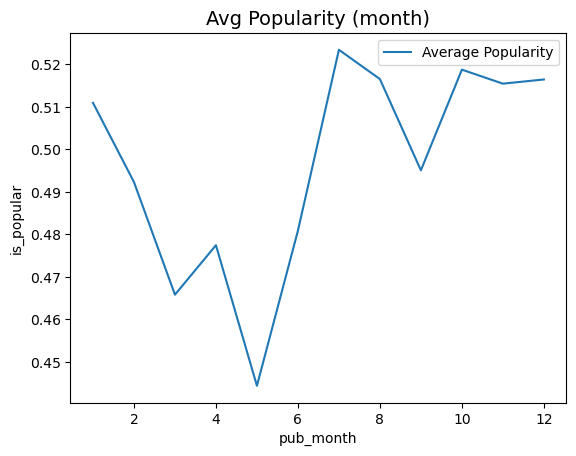

In [18]:
print(train.groupby('pub_month').mean()['is_popular'])
sns.lineplot(data = train.groupby('pub_month').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (month)', fontsize=14)
#train = train.drop(columns = ['pub_month'])
#train['is_noon'] = train['pub_time'].apply(lambda x : 1 if (x <= 3 or x >= 23) else 0)
#print(train.corr()['is_popular']['is_noon'])

<font size=6>News desk</font>

In [19]:
train['group_by_news_desk'] = train['is_popular'].groupby(train['news_desk']).transform('mean')
#train
#train = train.sort_values(['group_by_news_desk'],ascending=False)
print(train.corr()['is_popular']['group_by_news_desk'])
train['feature_news_desk'] = train['group_by_news_desk'].apply(lambda x : round(x, 1))
print(train.corr()['is_popular']['feature_news_desk'])

0.5276392203690563
0.5241742852440453


<font size=6>Section</font>

In [20]:
train['group_by_section_name'] = train['is_popular'].groupby(train['section_name']).transform('mean')
train = train.sort_values(['group_by_section_name'],ascending=False)
print(train.corr()['is_popular']['group_by_section_name'])
train['feature_section_name'] = train['group_by_news_desk'].apply(lambda x : round(x, 1))
print(train.corr()['is_popular']['feature_section_name'])

0.513286037396327
0.5241742852440473


<font size=6>Section</font>

In [37]:
train['group_by_section_name'] = train['is_popular'].groupby(train['section_name']).transform('mean')
#train = train.sort_values(['group_by_section_name'],ascending=False)
print(train.corr()['is_popular']['group_by_section_name'])
train['feature_section_name'] = train['group_by_news_desk'].apply(lambda x : round(x, 1))
print(train.corr()['is_popular']['feature_section_name'])

0.5132860373963289
0.5241742852440454


<font size=6>Subsection</font>

In [13]:
train['group_by_subsection_name'] = train['is_popular'].groupby(train['subsection_name']).transform('mean')
##train = train.sort_values(['group_by_subsection_name'],ascending=False)
print(train.corr()['is_popular']['group_by_subsection_name'])
train['feature_subsection_name'] = train['group_by_subsection_name'].apply(lambda x : round(x, 1))
print(train.corr()['is_popular']['feature_subsection_name'])

0.5272878518556022
0.5233115251446935


<font size=6>Material</font>

In [11]:
train['group_by_type_of_material'] = train['is_popular'].groupby(train['type_of_material']).transform('mean')
#train = train.sort_values(['group_by_type_of_material'],ascending=False)
print(train.corr()['is_popular']['group_by_type_of_material'])
train['feature_type_of_material'] = train['group_by_type_of_material'].apply(lambda x : round(x, 1))
print(train.corr()['is_popular']['feature_type_of_material'])

0.3771508392774008
0.37554067143797554


<font size=6>Keyword</font>

<font size=5>politics</font>


In [19]:
train['is_party'] = train['keywords'].apply(lambda x: 1 if ('Democratic Party' in x or 'Republican Party' in x ) else 0)
train['is_congress'] = train['keywords'].apply(lambda x: 1 if ('House of Representatives' in x or 'Senate' in x) else 0)
train['is_president'] = train['keywords'].apply(lambda x: 1 if ('Trump, Donald J' in x or 'Biden, Joseph R Jr' in x)else 0)
print(train.corr()['is_popular']['is_party'])
print(train.corr()['is_popular']['is_congress'])
print(train.corr()['is_popular']['is_president'])

0.17710226843875868
0.10725206168756221
0.21839772092174173


<font size=5>event ( ukrainian_russian_war, covid, Storming of the US Capitol )</font>


In [35]:
train['is_ukrainian_russian_war'] = train['keywords'].apply(lambda x: 1 if ('War and Armed Conflicts' in x or 'Ukraine' in x ) else 0)
train['is_covid'] = train['keywords'].apply(lambda x: 1 if 'Coronavirus (2019-nCoV)' in x else 0)
train['is_storm'] = train['keywords'].apply(lambda x: 1 if 'Storming of the US Capitol (Jan, 2021)' in x else 0)
print('ukrainian_russian_war     ', train.corr()['is_popular']['is_ukrainian_russian_war'])
print('Coronavirus               ', train.corr()['is_popular']['is_covid'])
print('Storming of the US Capitol', train.corr()['is_popular']['is_storm'])

ukrainian_russian_war      0.05076621775086375
Coronavirus                0.039280358995824445
Storming of the US Capitol 0.11141645881465602


<font size=5>little game</font>

In [29]:
train['is_spell'] = train['keywords'].apply(lambda x: 1 if 'Spelling Bee (Game)' in x else 0)
train['is_crossword'] = train['keywords'].apply(lambda x: 1 if 'Crossword Puzzles' in x else 0)
train['is_game'] = train['keywords'].apply(lambda x: 1 if 'Spelling Bee (Game)'  in x or 'Crossword Puzzles' in x else 0)
print(train.corr()['is_popular']['is_spell'])
print(train.corr()['is_popular']['is_crossword'])
print(train.corr()['is_popular']['is_game'])

0.07844296168977698
0.11369271059337856
0.13931350271124687


<font size=6>abstract length</font>

-0.1348817647890066


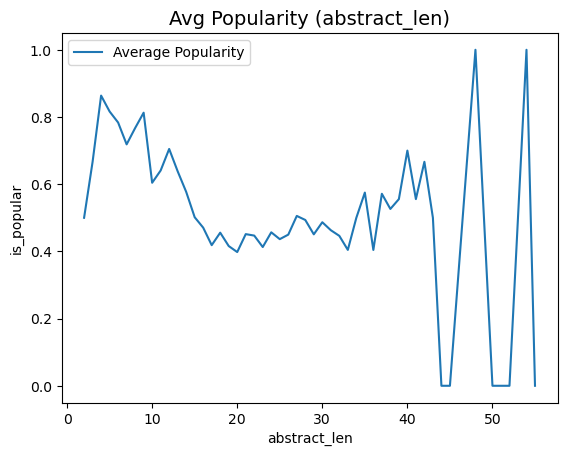

In [32]:
#print(train.groupby('abstract_len').mean()['is_popular'])
sns.lineplot(data = train.groupby('abstract_len').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (abstract_len)', fontsize=14)
print(train.corr()['is_popular']['abstract_len'])

<font size=6>headline length</font>

-0.009009345477795297


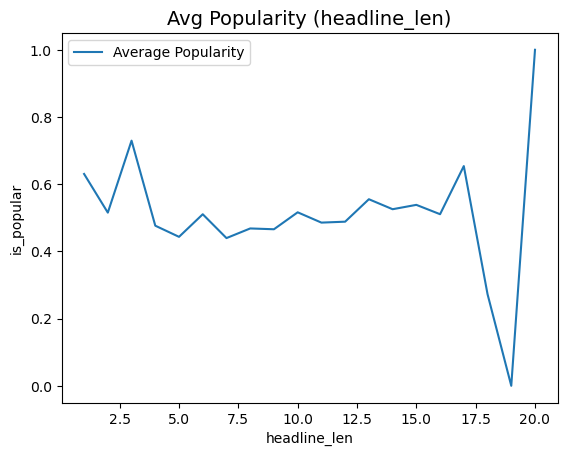

In [33]:
#print(train.groupby('abstract_len').mean()['is_popular'])
sns.lineplot(data = train.groupby('headline_len').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (headline_len)', fontsize=14)
print(train.corr()['is_popular']['headline_len'])

<font size=6>word count</font>

0.15087978485852233


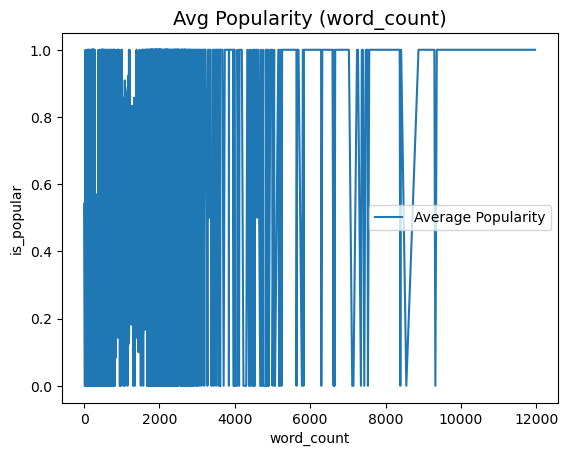

In [34]:
#print(train.groupby('abstract_len').mean()['is_popular'])
sns.lineplot(data = train.groupby('word_count').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (word_count)', fontsize=14)
print(train.corr()['is_popular']['word_count'])

Index([ 'print_section', 'print_page', 'word_count', 'subsection_name', 'pub_year',
       'abstract','abstract_dup', 'headline', 
       'headline_dup', 'headline_kicker', 'len_lead', 
       'is_popular'],
      dtype='object')